In [1]:
import tensorflow as tf
import sys  
import os
sys.path.append(os.path.realpath('../../src'))
from predict import pred_using_h5_digit, pred_using_tflite_model
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

2022-12-14 12:14:59.711789: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-14 12:14:59.711810: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
model = tf.keras.models.load_model('/home/venkateshiyer/react-native-saral-sdk/ml_models/handwritten_digits/models/saved_model/checkpoint_03_0.01.h5')

2022-12-14 12:15:01.501060: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-14 12:15:01.501086: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ti-lap-492): /proc/driver/nvidia/version does not exist
2022-12-14 12:15:01.501367: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# To insert background in the image
def get_mask(image):
    image = cv2.imread(image, cv2.IMREAD_UNCHANGED)    
    #make mask of where the transparent bits are
    trans_mask = image[:,:,3] == 0
    #replace areas of transparency with white and not transparent
    image[trans_mask] = [255, 255, 255, 255]
    #new image without alpha channel...
    new_img = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
    return new_img

In [4]:
def pred_using_h5_digit(model, path, gt = None, prediction= None, wrong_results = None):
    result = {}
    wrong_results = {}
    gt=[]
    prediction = []
    wrong_count=0
    for img1 in sorted(glob.iglob(path)):
        img=cv2.imread(img1)
        img=cv2.resize(img,(28,28))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.astype('float32') / 255.
        img= np.reshape(img,(1,28,28,1))
        res=model.predict(img)
        pred=res[0].argmax(axis=0)
        ground_truth = int(img1.split('/')[-2])
        gt.append(int(ground_truth))
        prediction.append(pred)
        result[img1] = pred
        if pred!= int(ground_truth):
            wrong_count+=1
            wrong_results[img1] = pred
    accuracy = (len(glob.glob(path))-wrong_count)/len(glob.glob(path))
    return result, accuracy, gt, prediction, wrong_results

In [5]:
path = '/home/venkateshiyer/handwritten_digits_test/0/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

2022-12-14 12:15:13.107786: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [6]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.8215686274509804
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       510
           1       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.82       510
   macro avg       0.14      0.12      0.13       510
weighted avg       1.00      0.82      0.90       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
len(wrong_results)

91

Text(0.5, 0.98, 'Misclassifications')

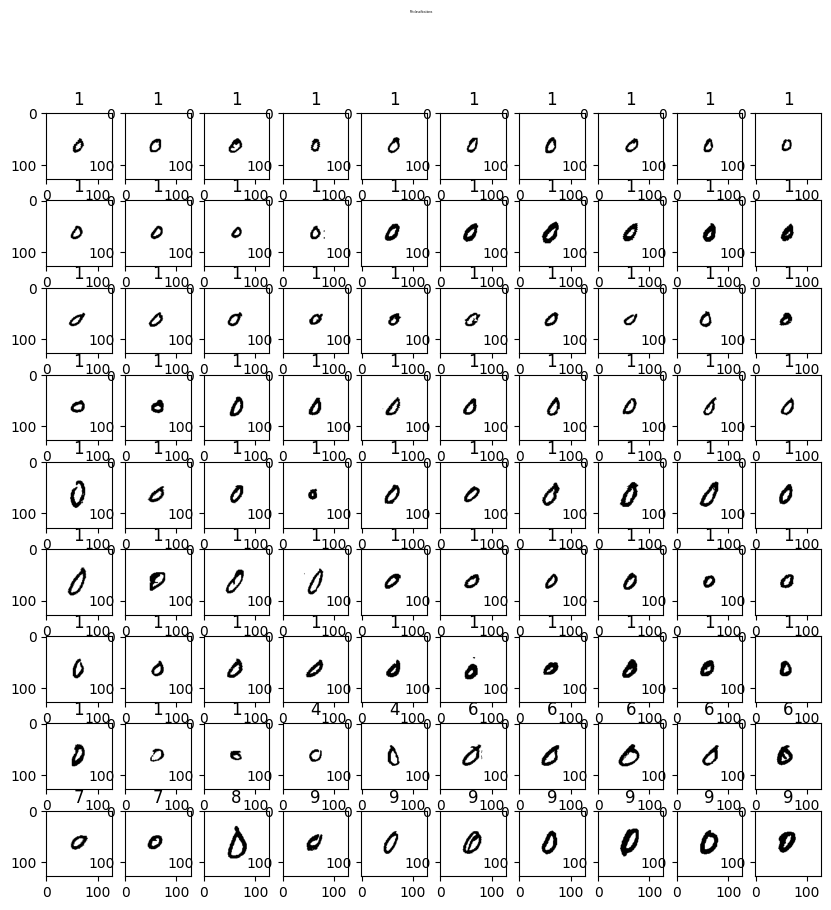

In [18]:
import operator
fig, axis = plt.subplots(nrows= 9, ncols=10, figsize=(10,10))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items(), key=operator.itemgetter(1))[:90]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [19]:
path = '/home/venkateshiyer/handwritten_digits_test/1/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [20]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.6843137254901961
              precision    recall  f1-score   support

           1       1.00      0.68      0.81       510
           7       0.00      0.00      0.00         0

    accuracy                           0.68       510
   macro avg       0.50      0.34      0.41       510
weighted avg       1.00      0.68      0.81       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
len(wrong_results)

161

Text(0.5, 0.98, 'Misclassifications')

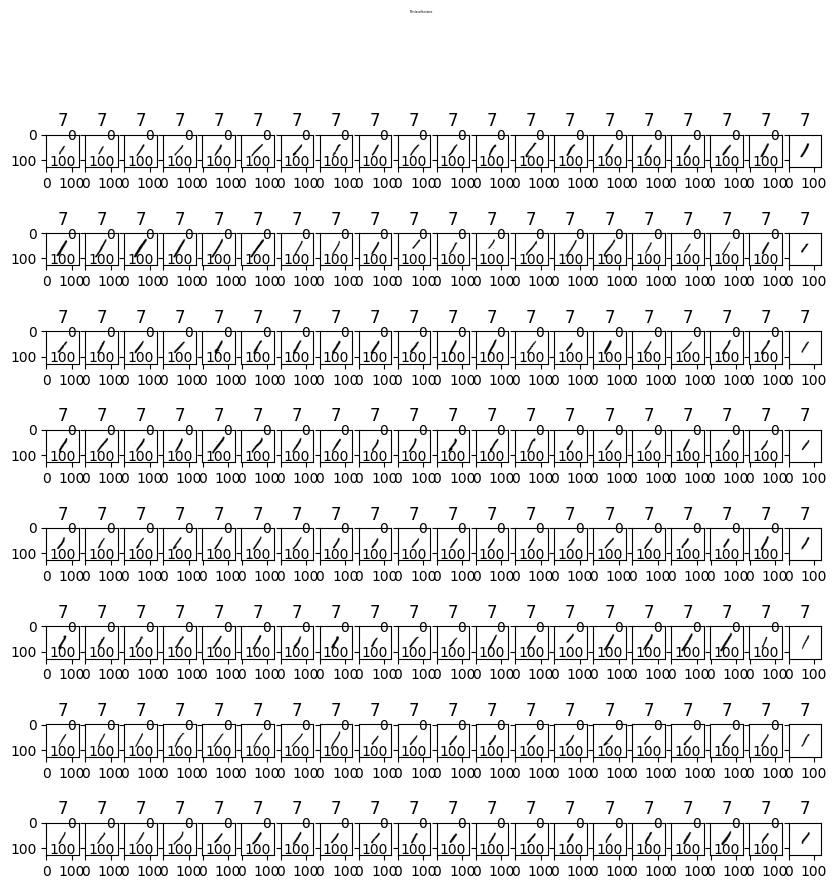

In [22]:
import operator
fig, axis = plt.subplots(nrows= 8, ncols=20, figsize=(10,10))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items(), key=operator.itemgetter(1))[:160]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [23]:
path = '/home/venkateshiyer/handwritten_digits_test/2/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [24]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.30392156862745096
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.30      0.47       510
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.30       510
   macro avg       0.12      0.04      0.06       510
weighted avg       1.00      0.30      0.47       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
len(wrong_results)

355

Text(0.5, 0.98, 'Misclassifications')

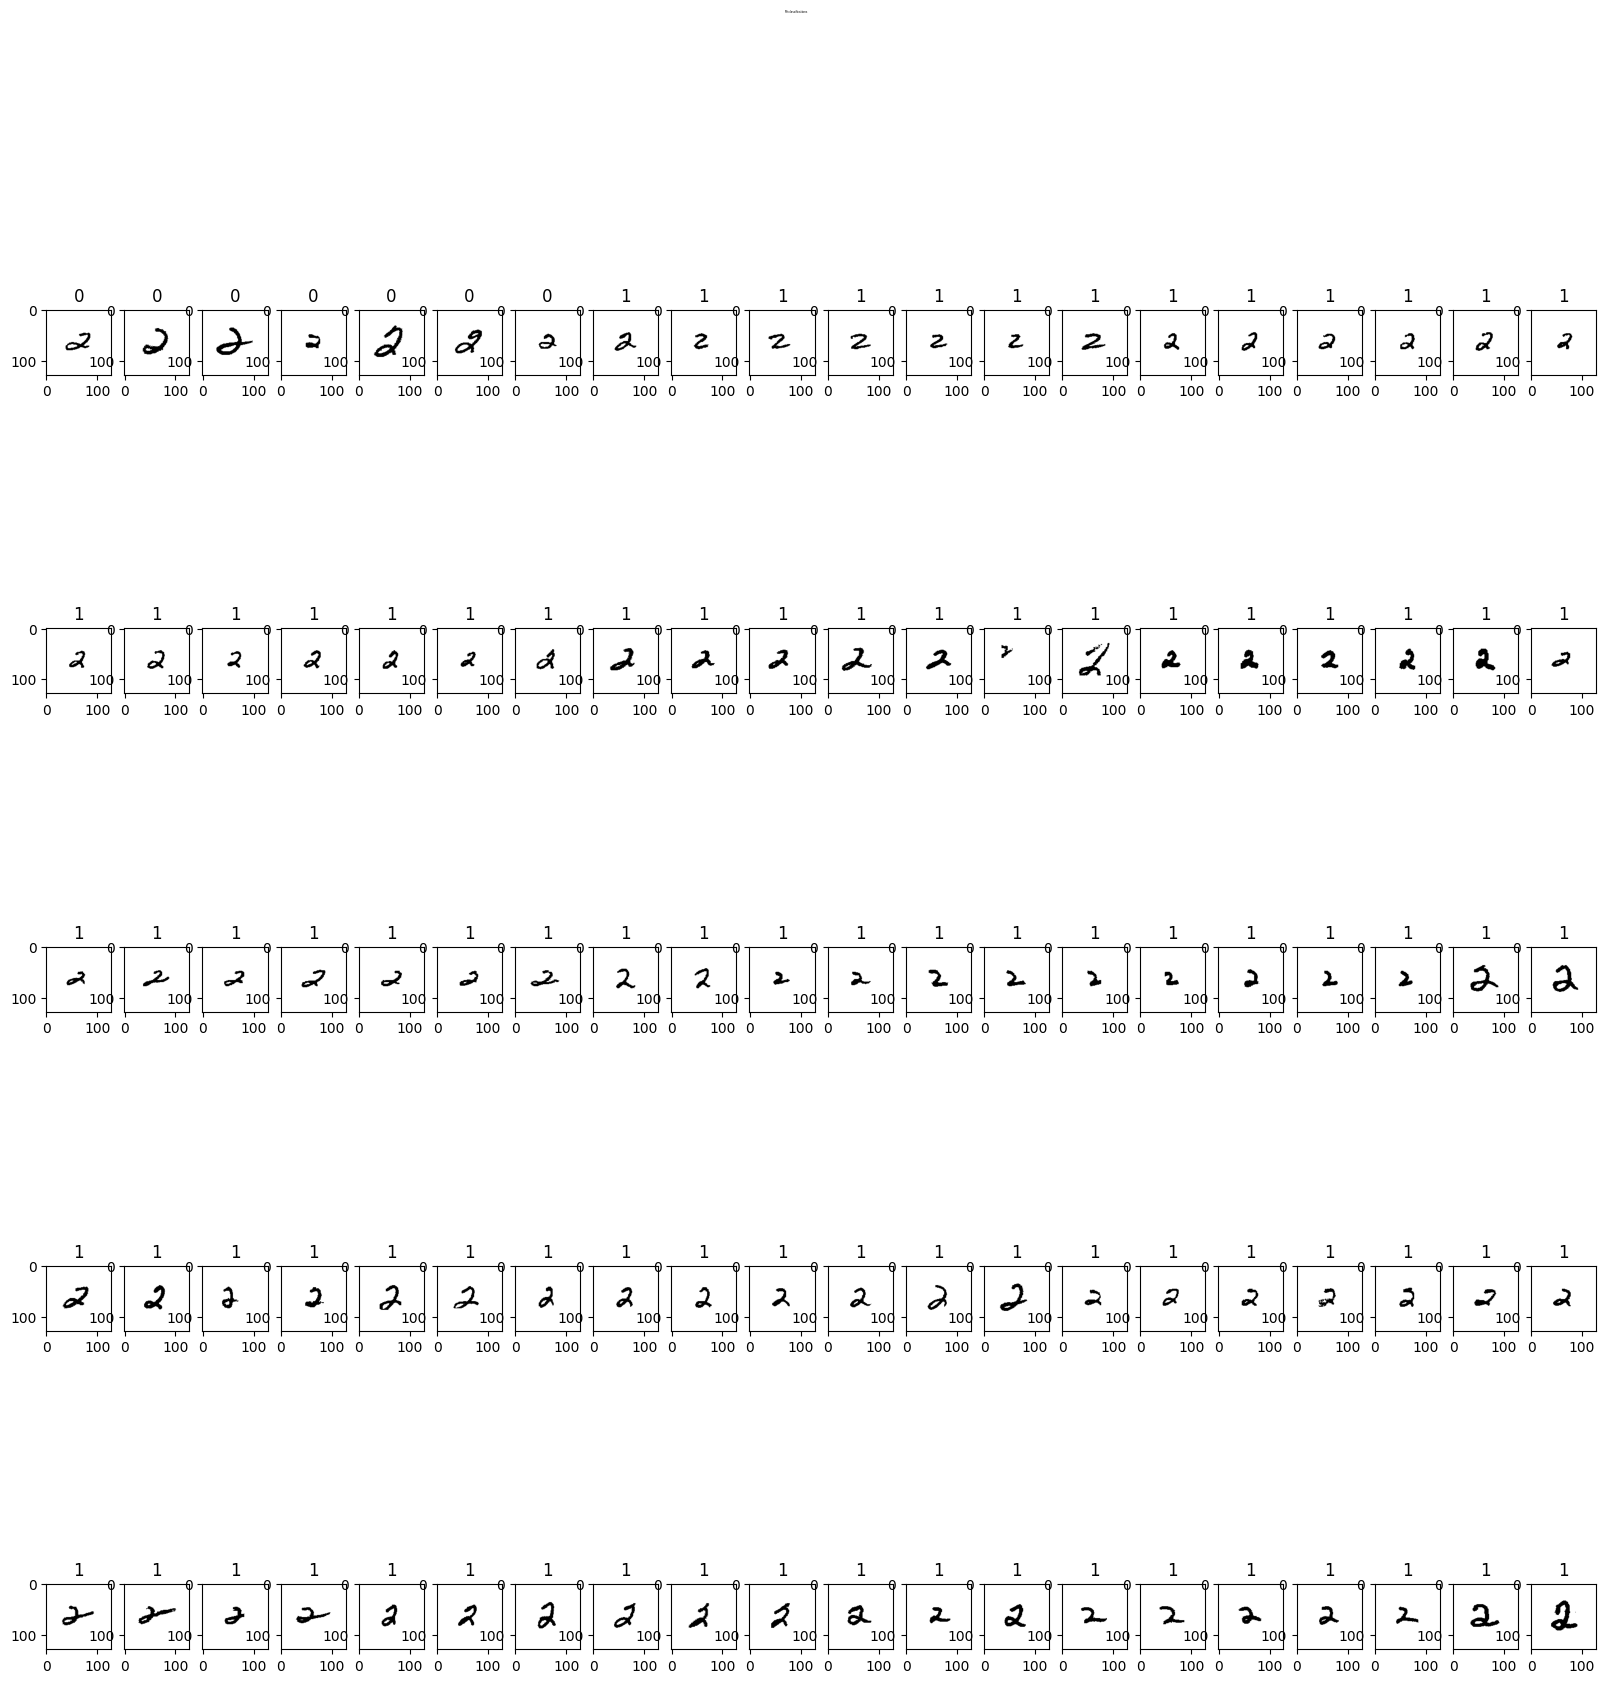

In [28]:
import operator
fig, axis = plt.subplots(nrows= 5, ncols=20, figsize=(20,20))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items(), key=operator.itemgetter(1))[:100]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [29]:
path = '/home/venkateshiyer/handwritten_digits_test/3/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [30]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.6137254901960785
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           3       1.00      0.61      0.76       510
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.61       510
   macro avg       0.12      0.08      0.10       510
weighted avg       1.00      0.61      0.76       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
len(wrong_results)

197

Text(0.5, 0.98, 'Misclassifications')

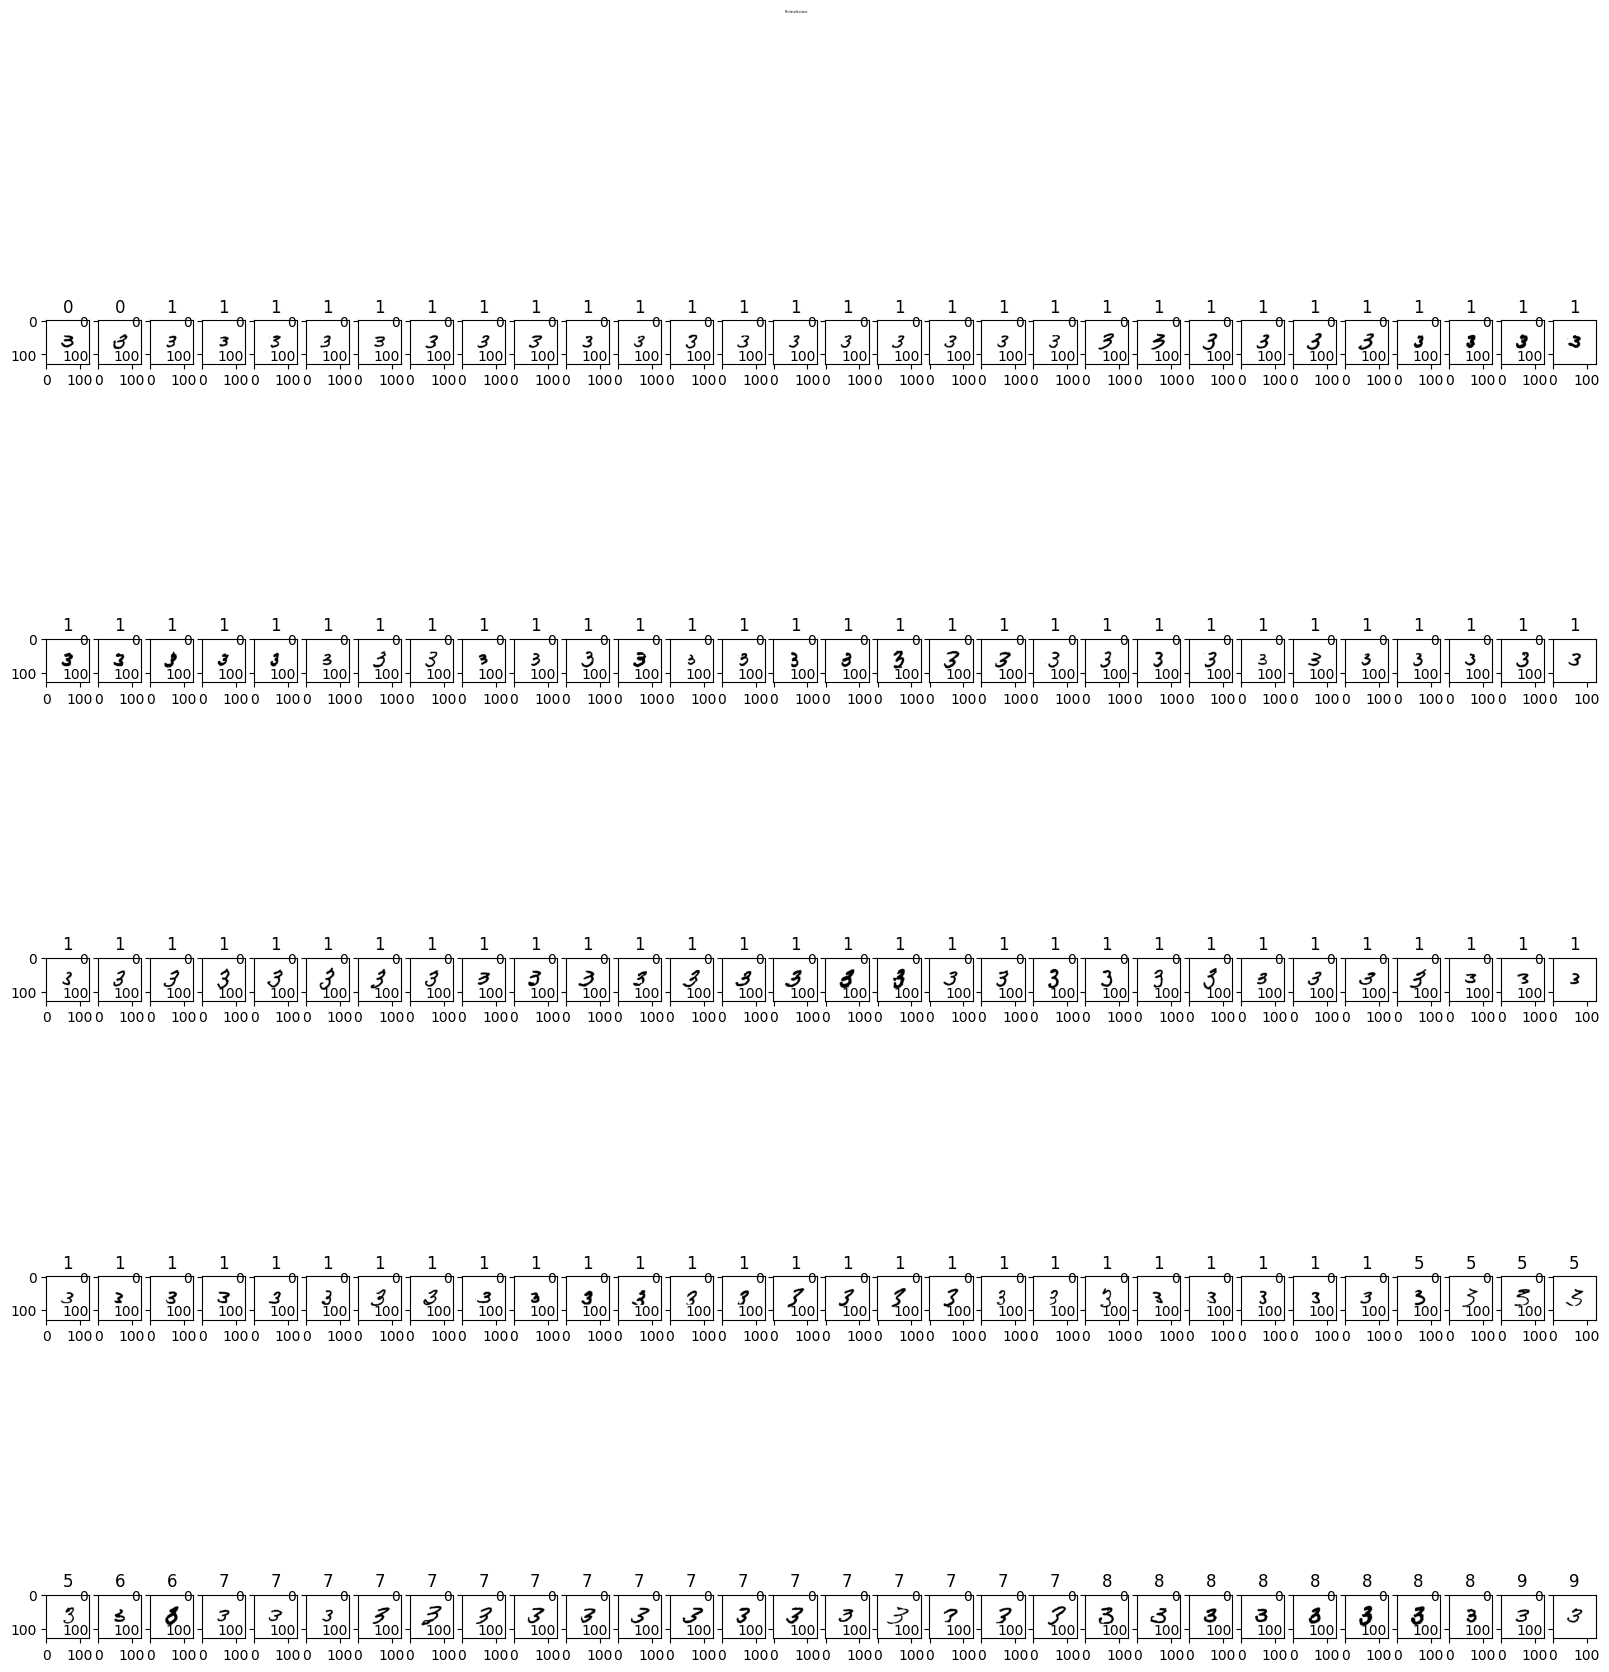

In [32]:
import operator
fig, axis = plt.subplots(nrows= 5, ncols=30, figsize=(20,20))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items(), key=operator.itemgetter(1))[:150]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [33]:
path = '/home/venkateshiyer/handwritten_digits_test/4/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [34]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.31176470588235294
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           4       1.00      0.31      0.48       510
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.31       510
   macro avg       0.17      0.05      0.08       510
weighted avg       1.00      0.31      0.48       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
len(wrong_results)

351

Text(0.5, 0.98, 'Misclassifications')

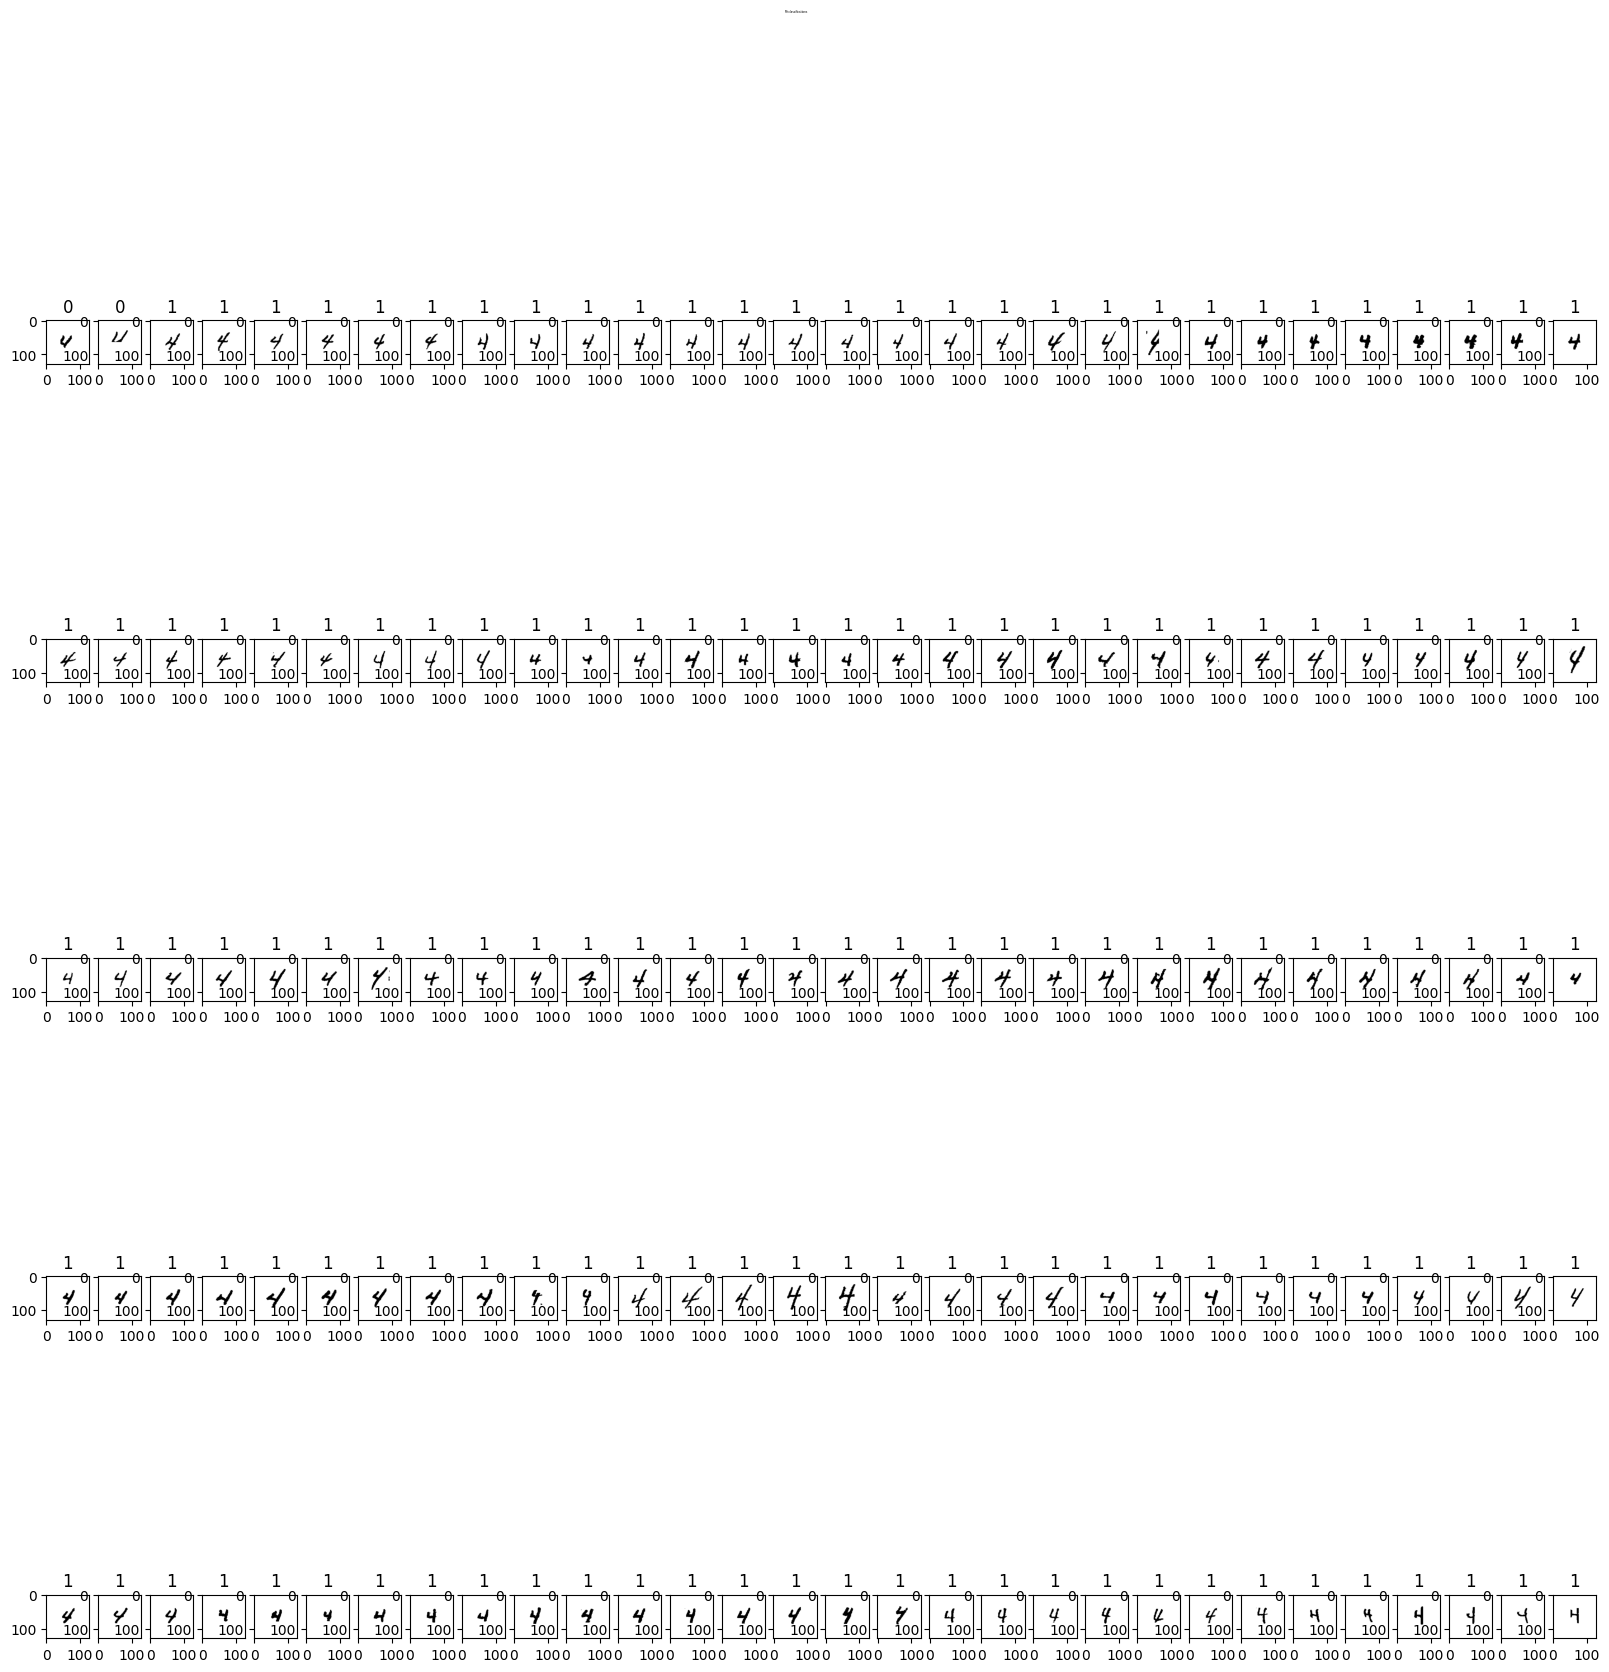

In [36]:
import operator
fig, axis = plt.subplots(nrows= 5, ncols=30, figsize=(20,20))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items(), key=operator.itemgetter(1))[:150]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [37]:
path = '/home/venkateshiyer/handwritten_digits_test/5/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [38]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.7705882352941177
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       1.00      0.77      0.87       510
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.77       510
   macro avg       0.17      0.13      0.15       510
weighted avg       1.00      0.77      0.87       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
len(wrong_results)

117

Text(0.5, 0.98, 'Misclassifications')

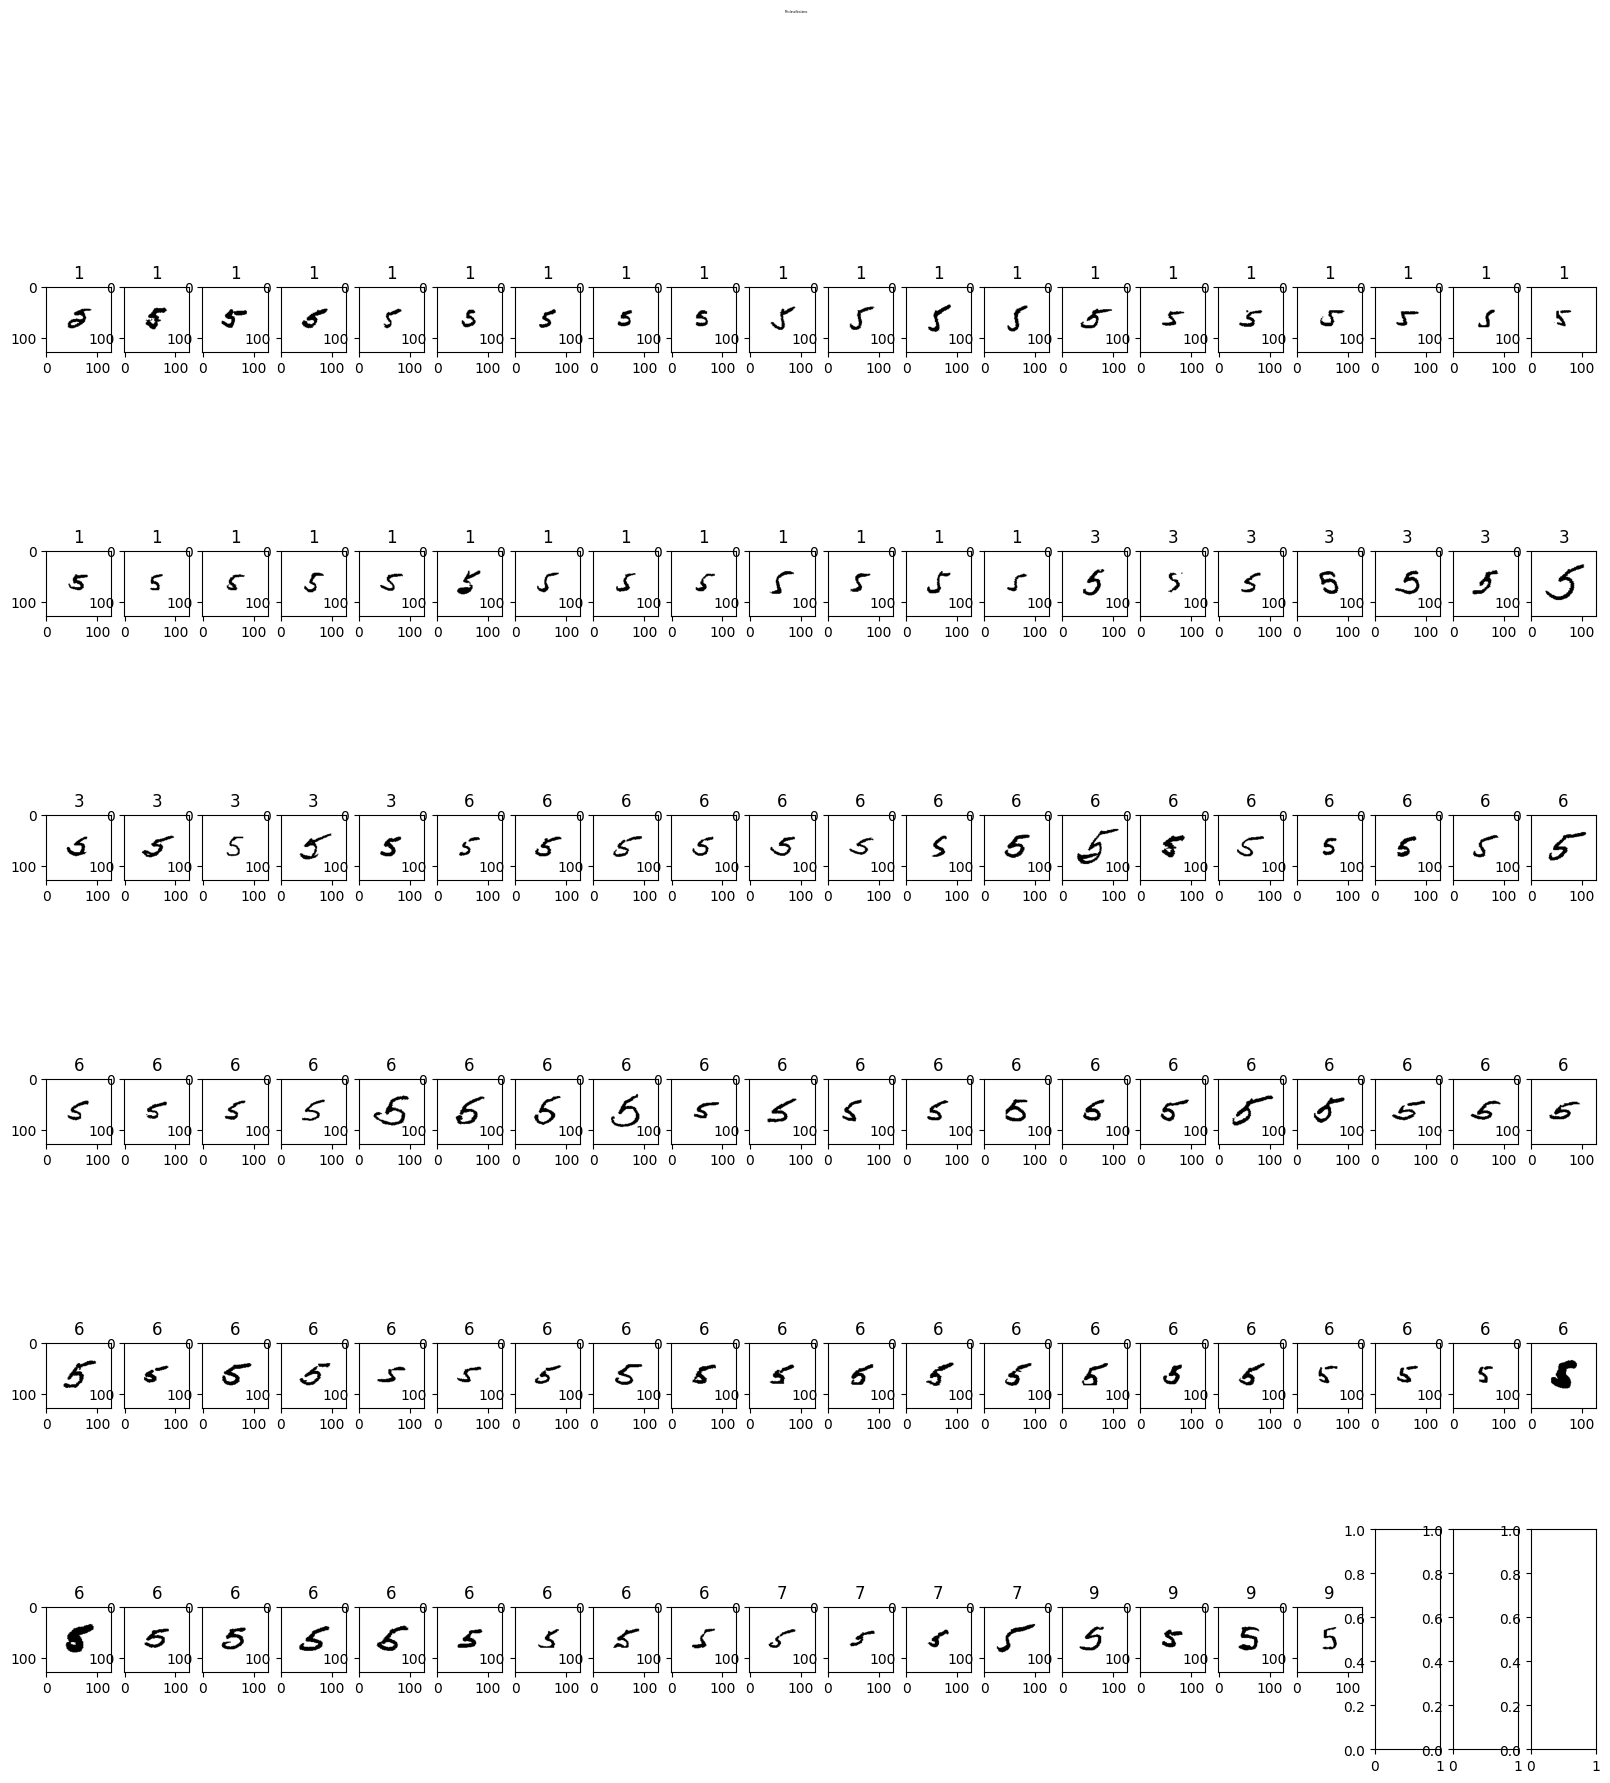

In [40]:
import operator
fig, axis = plt.subplots(nrows= 6, ncols=20, figsize=(20,20))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items(), key=operator.itemgetter(1))[:120]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [41]:
path = '/home/venkateshiyer/handwritten_digits_test/6/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [42]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.7098039215686275
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           6       1.00      0.71      0.83       510

    accuracy                           0.71       510
   macro avg       0.25      0.18      0.21       510
weighted avg       1.00      0.71      0.83       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
len(wrong_results)

148

IndexError: index 50 is out of bounds for axis 0 with size 50

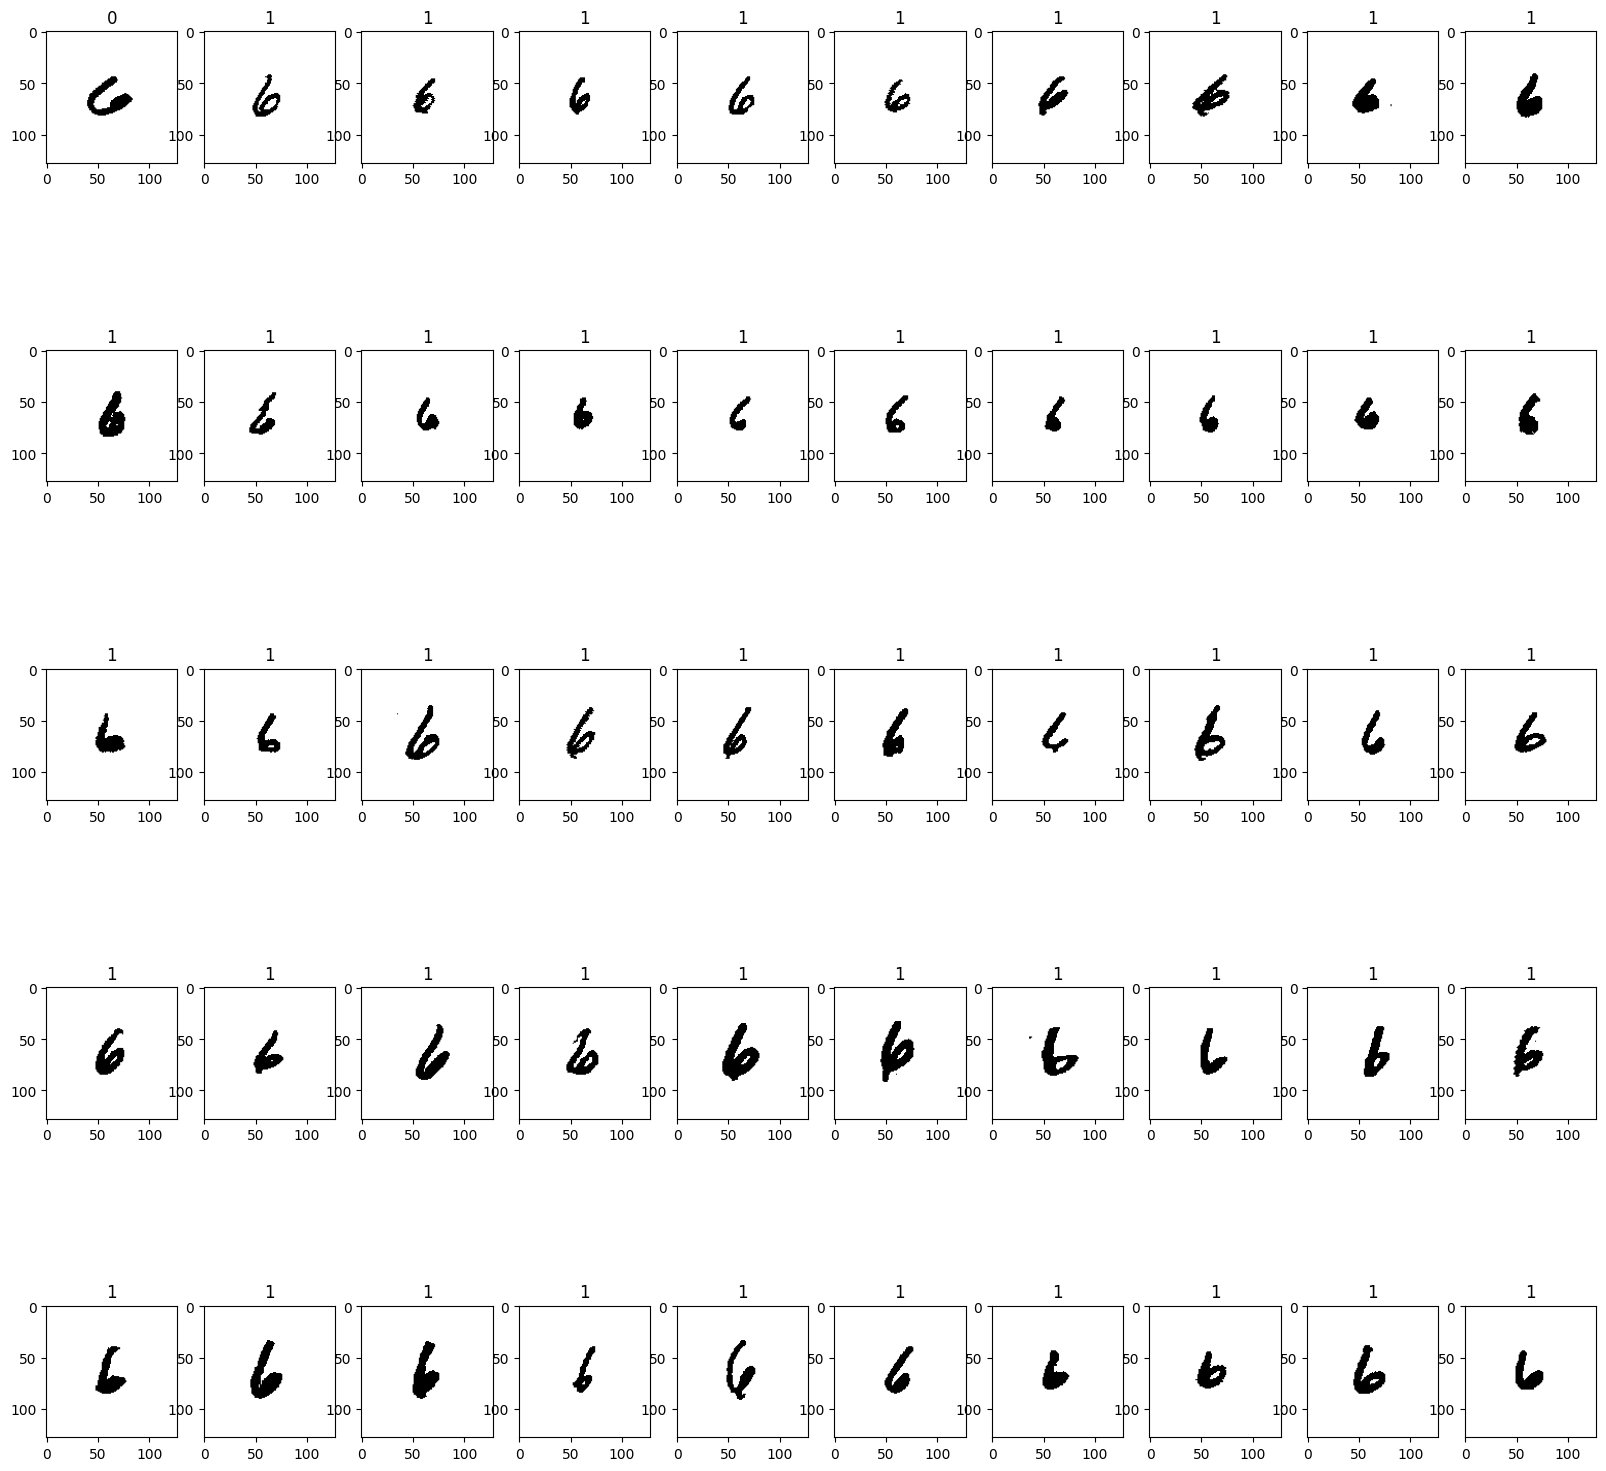

In [44]:
import operator
fig, axis = plt.subplots(nrows= 5, ncols=10, figsize=(20,20))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items(), key=operator.itemgetter(1))[:150]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [45]:
path = '/home/venkateshiyer/handwritten_digits_test/7/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [46]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.6588235294117647
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           7       1.00      0.66      0.79       510
           9       0.00      0.00      0.00         0

    accuracy                           0.66       510
   macro avg       0.25      0.16      0.20       510
weighted avg       1.00      0.66      0.79       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
len(wrong_results)

174

IndexError: index 50 is out of bounds for axis 0 with size 50

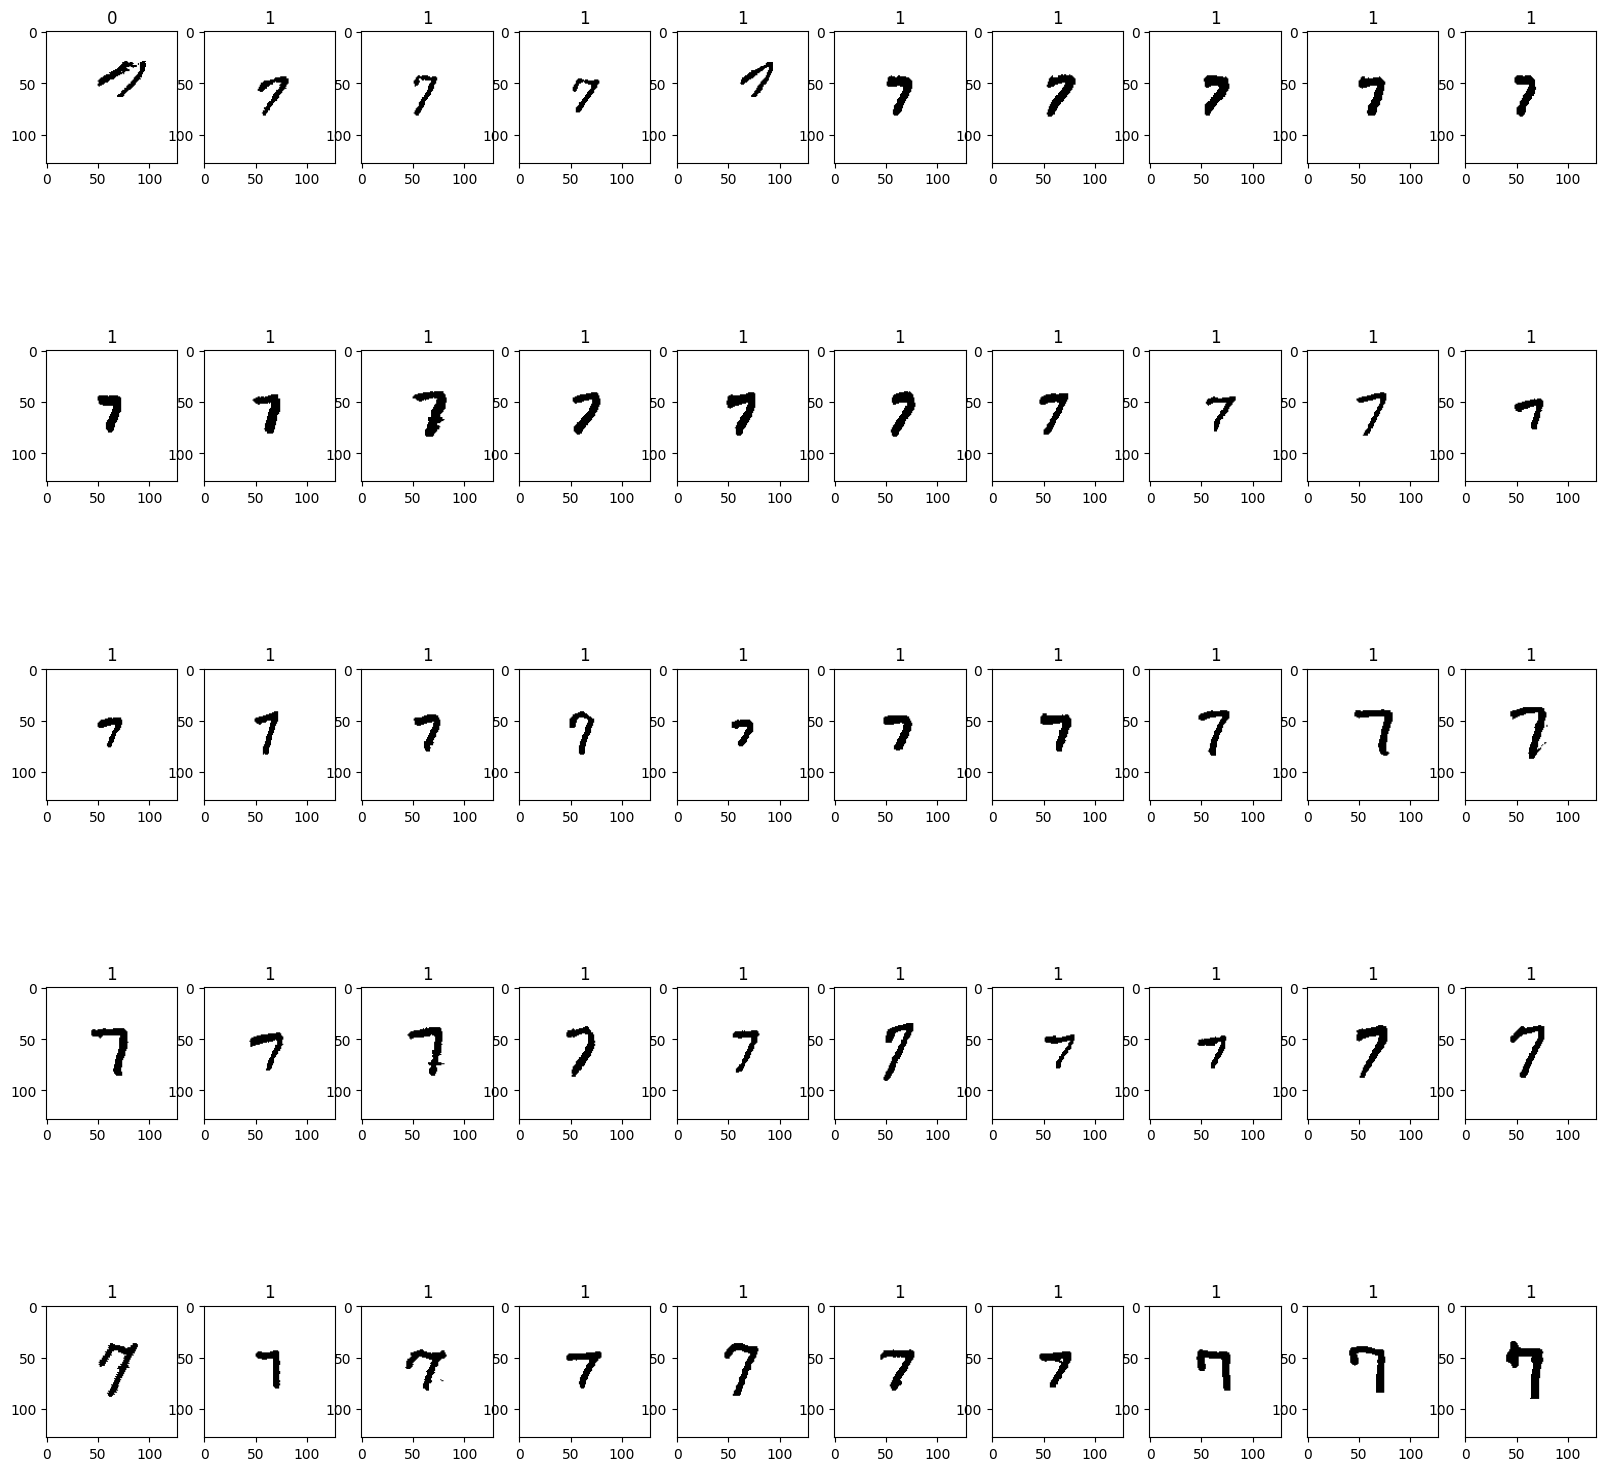

In [48]:
import operator
fig, axis = plt.subplots(nrows= 5, ncols=10, figsize=(20,20))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items(), key=operator.itemgetter(1))[:150]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [49]:
path = '/home/venkateshiyer/handwritten_digits_test/8/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [50]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.42549019607843136
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       1.00      0.43      0.60       510
           9       0.00      0.00      0.00         0

    accuracy                           0.43       510
   macro avg       0.12      0.05      0.07       510
weighted avg       1.00      0.43      0.60       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
len(wrong_results)

293

Text(0.5, 0.98, 'Misclassifications')

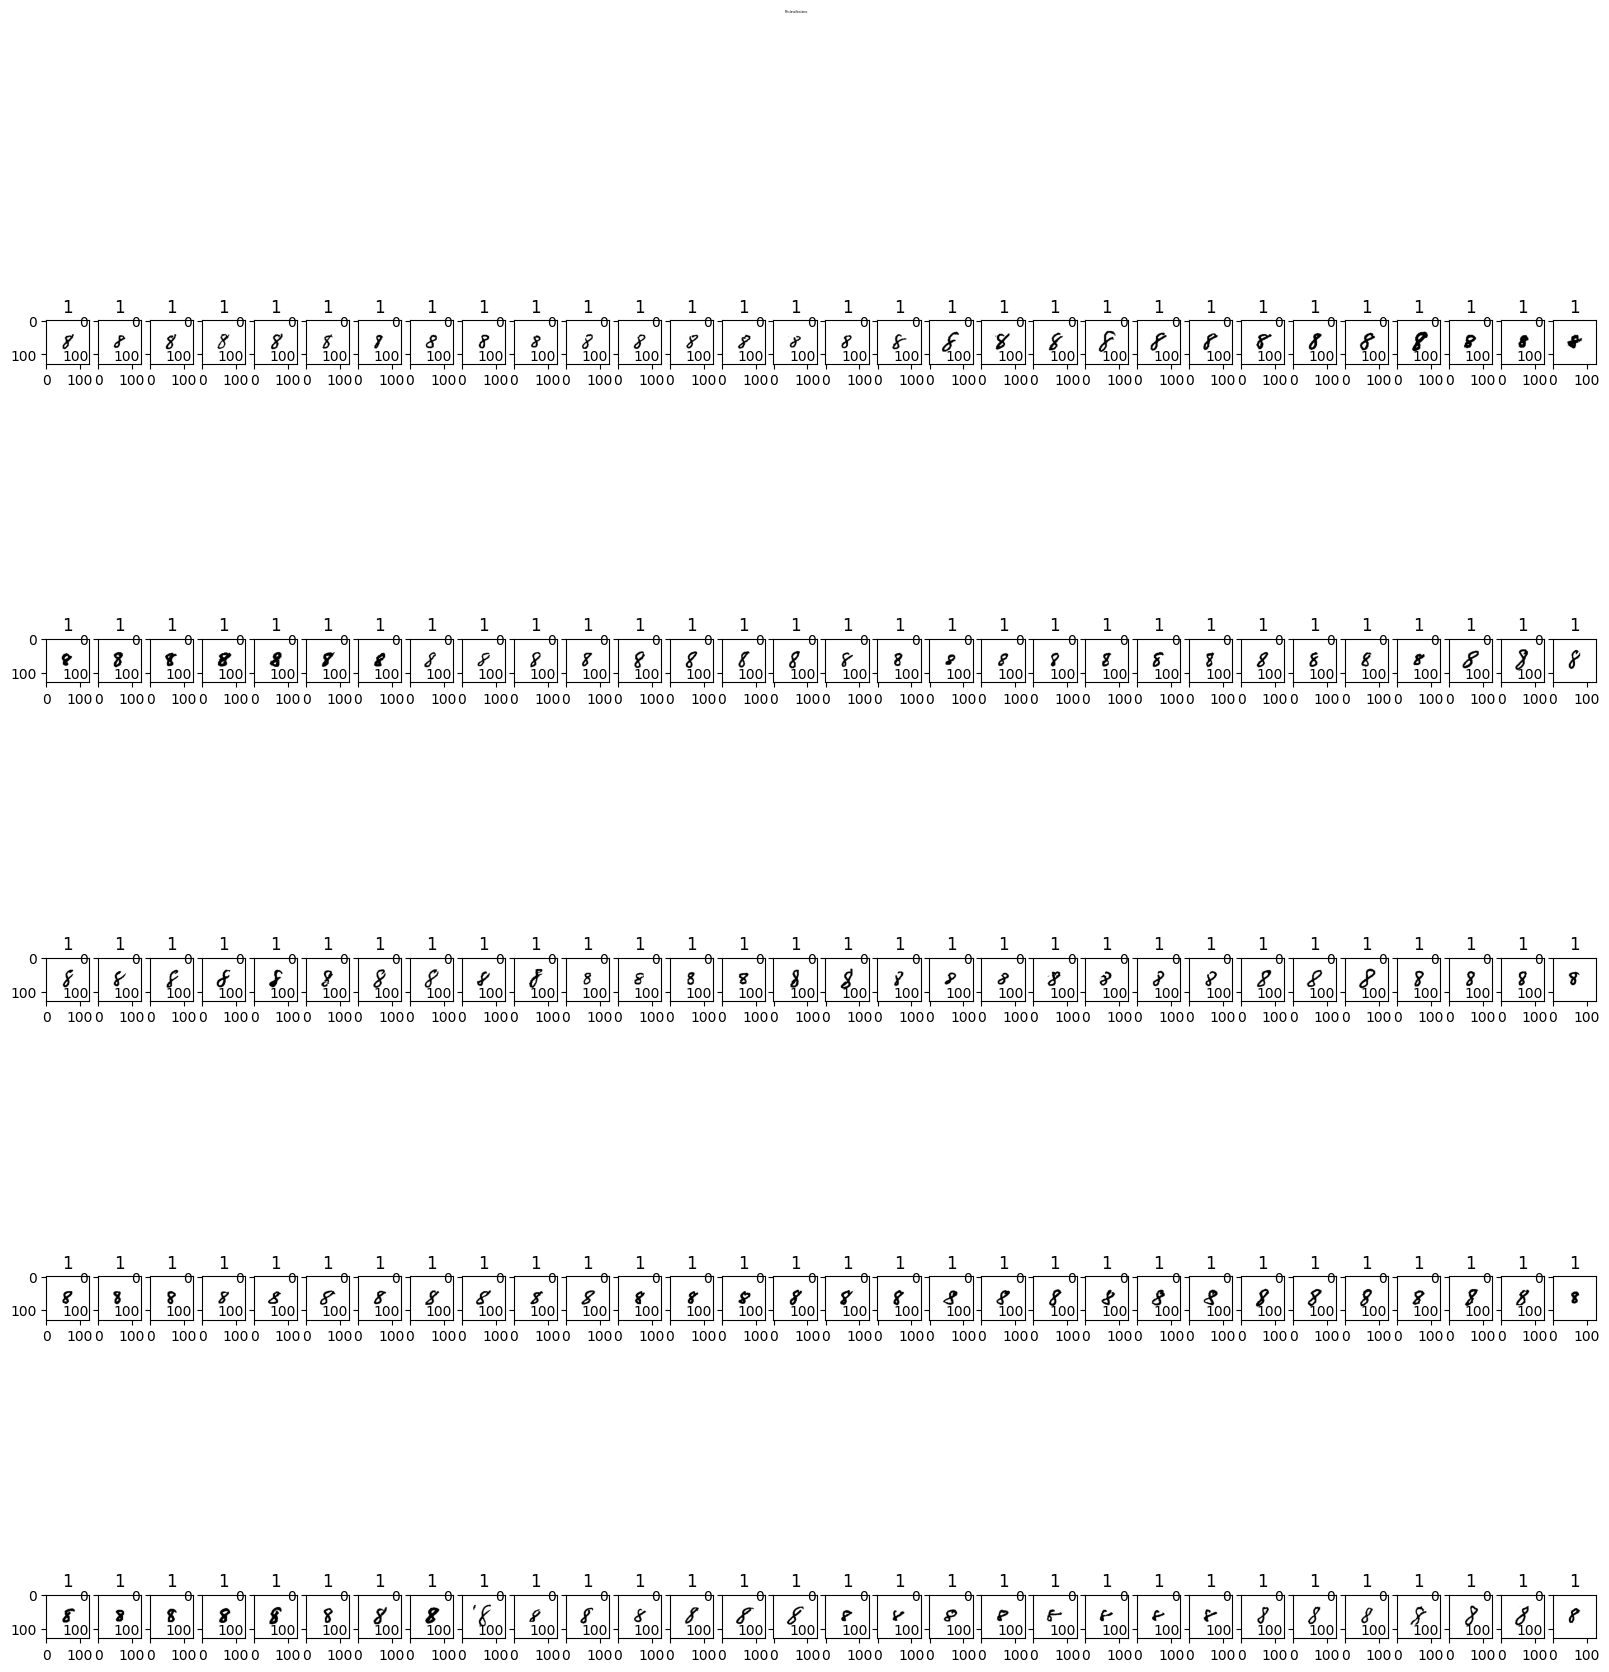

In [52]:
import operator
fig, axis = plt.subplots(nrows= 5, ncols=30, figsize=(20,20))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items(), key=operator.itemgetter(1))[:150]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)

In [53]:
path = '/home/venkateshiyer/handwritten_digits_test/9/*'
result, accuracy, gt, prediction, wrong_results = pred_using_h5_digit(model,path)

In [54]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.7568627450980392
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       1.00      0.76      0.86       510

    accuracy                           0.76       510
   macro avg       0.25      0.19      0.22       510
weighted avg       1.00      0.76      0.86       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
len(wrong_results)

124

Text(0.5, 0.98, 'Misclassifications')

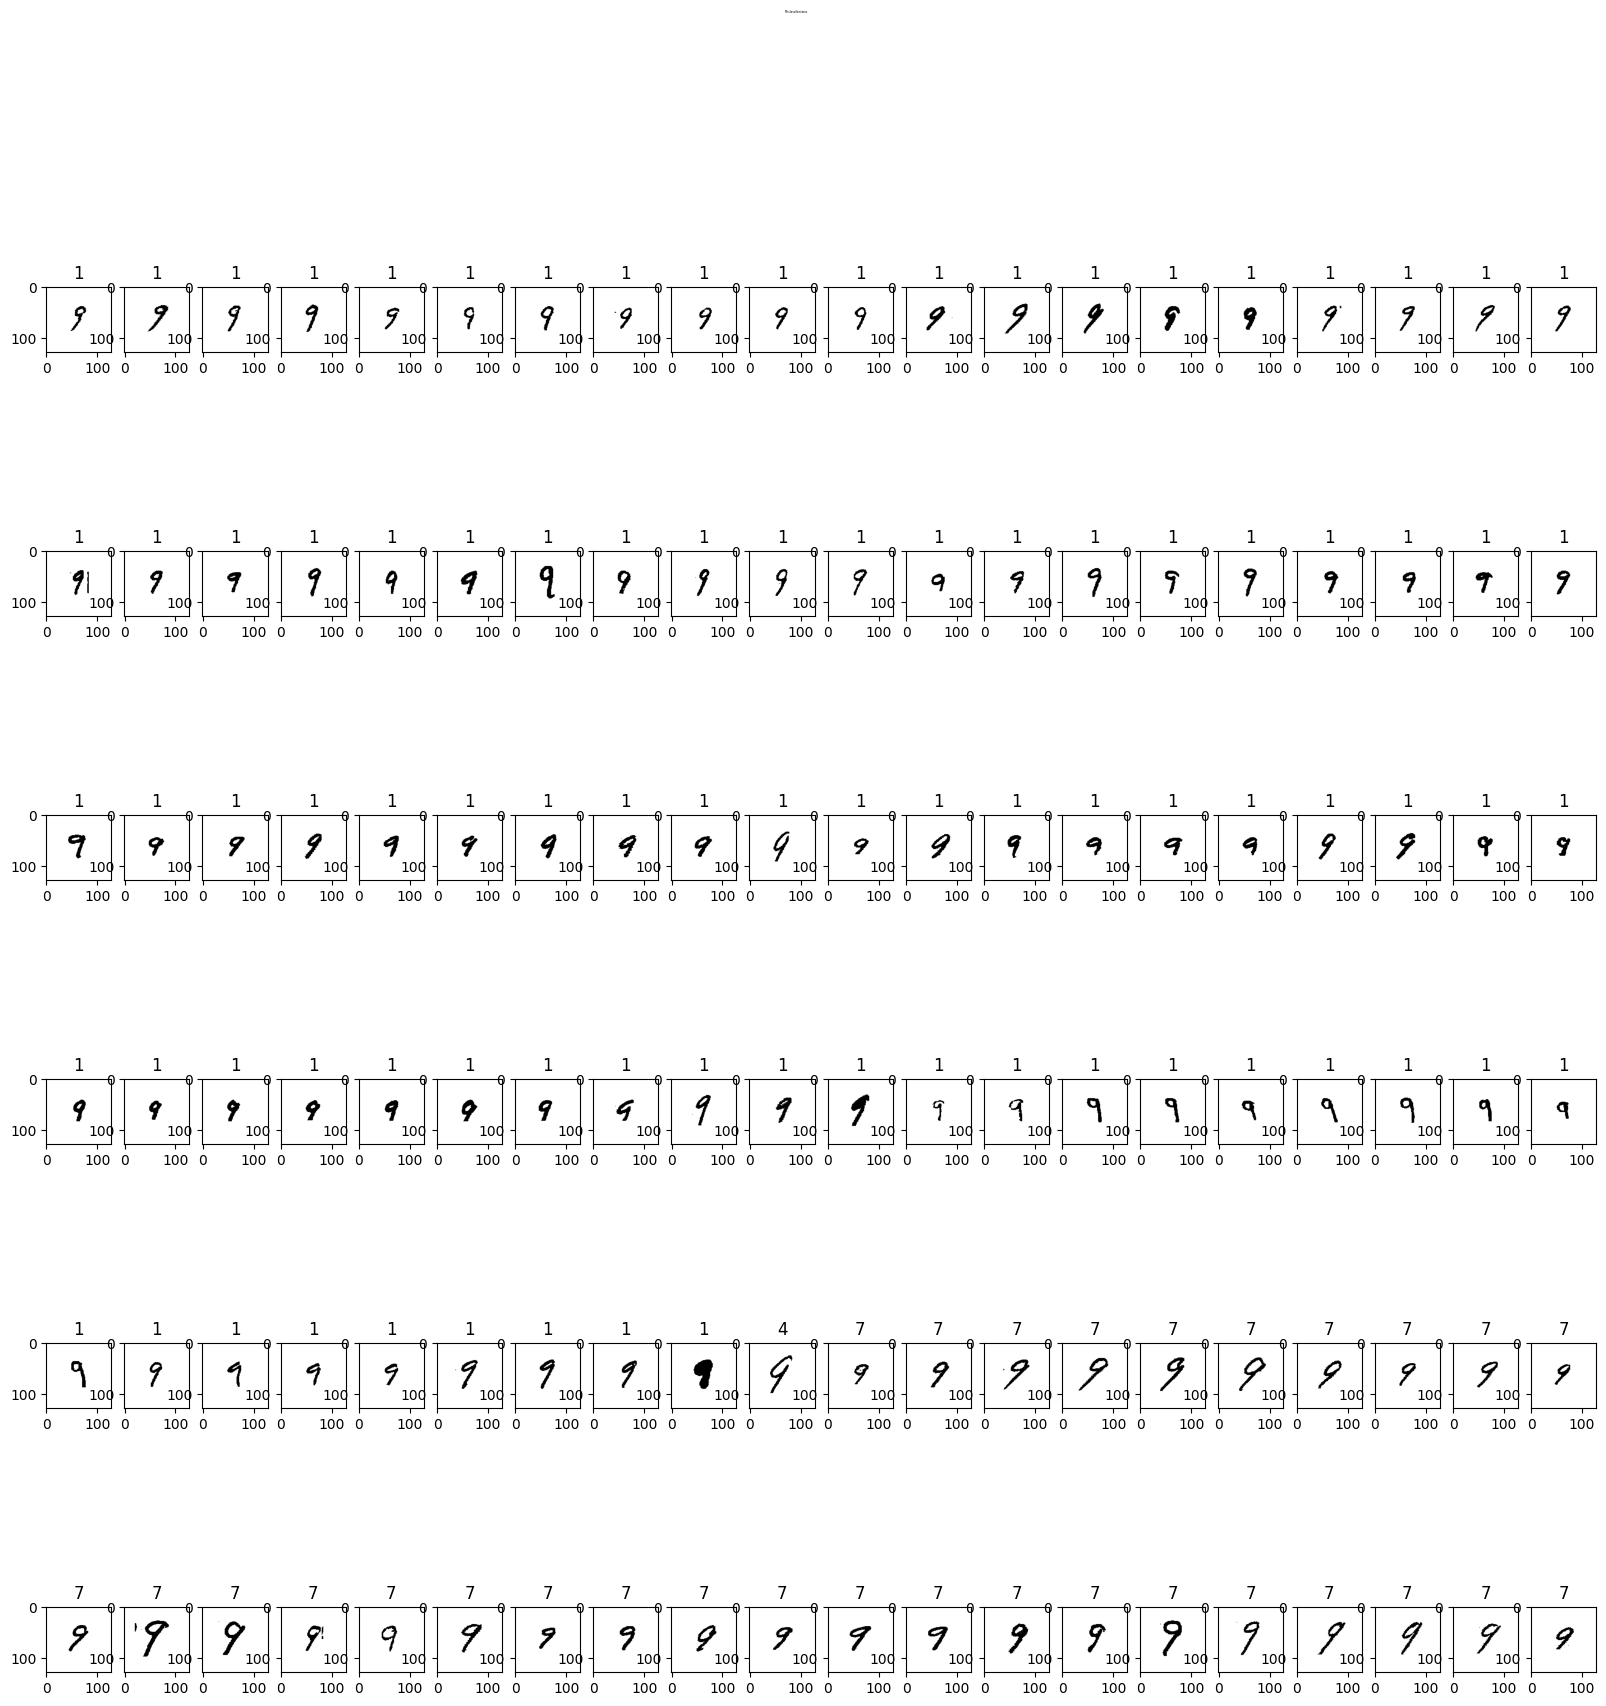

In [56]:
import operator
fig, axis = plt.subplots(nrows= 6, ncols=20, figsize=(20,20))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_results.items(), key=operator.itemgetter(1))[:120]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=2)